# Analysis Results

3ML stores the results of a fit in a container we call an "Analysis Result" (AR). The structure of this object is designed to be useable in a *live* sense within an *active* analysis (python script, ipython interactive shell, jupyter notebook) as well as storable as a FITS file for saving results for later.

The structure is nearly the same between MLE and Bayesian analyses in order to make a seamless functionality between all analyses.


In [1]:
%%capture
import numpy as np

np.seterr(all="ignore")
from threeML import *
from threeML.analysis_results import *
import astropy.units as u

In [2]:
silence_logs()
from tqdm.auto import tqdm
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
import matplotlib.pyplot as plt

set_threeML_style()

Let's take a look at what we can do with an AR. First, we will simulate some data.

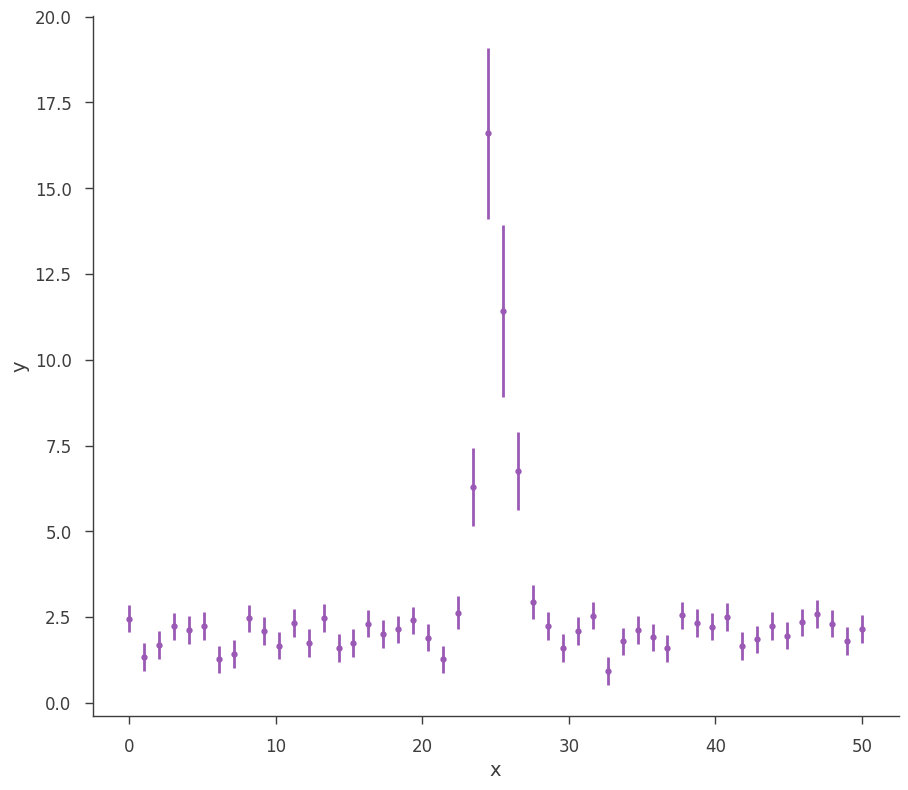

In [3]:
gen_function = Line(a=2, b=0) + Gaussian(F=30.0, mu=25.0, sigma=1)

# Generate a dataset using the line and a gaussian.
# constant 20% error

x = np.linspace(0, 50, 50)

xy = XYLike.from_function(
    "sim_data", function=gen_function, x=x, yerr=0.2 * gen_function(x)
)

fig = xy.plot()

## MLE Results


First we will demonstrate how AR's work for an MLE analysis on our synthetic data. As we will see, most of the functionality exists in the Bayesian AR's as well.

Let's do a simple likelihood maximization of our data and model.

In [4]:
fitfun = Line() + Gaussian()

fitfun.b_1.bounds = (-10, 10.0)
fitfun.a_1.bounds = (-100, 100.0)
fitfun.F_2 = 25.0
fitfun.F_2.bounds = (1e-3, 200.0)
fitfun.mu_2 = 25.0
fitfun.mu_2.bounds = (0.0, 100.0)
fitfun.sigma_2.bounds = (1e-3, 10.0)

model = Model(PointSource("fake", 0.0, 0.0, fitfun))

data = DataList(xy)

jl = JointLikelihood(model, DataList(xy))
_ = jl.fit()

Best fit values:

,result,unit
parameter,,
fake.spectrum.main.composite.a_1,1.89 +/- 0.11,1 / (keV s cm2)
fake.spectrum.main.composite.b_1,(5 +/- 4) x 10^-3,1 / (s cm2 keV2)
fake.spectrum.main.composite.F_2,(3.5 +/- 0.4) x 10,1 / (s cm2)
fake.spectrum.main.composite.mu_2,(2.500 +/- 0.010) x 10,keV
fake.spectrum.main.composite.sigma_2,1.05 +/- 0.08,keV


Correlation matrix:

1.00,-0.85,-0.04,0.00,-0.08
-0.85,1.00,0.00,-0.02,-0.00
-0.04,0.00,1.00,-0.03,-0.17
0.00,-0.02,-0.03,1.00,0.18
-0.08,-0.00,-0.17,0.18,1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
sim_data,22.354013
total,22.354013


Values of statistical measures:

,statistical measures
AIC,56.071662
BIC,64.268141


We can get our errors as always, but the results cannot be propagated (error propagation assumes Gaussian errors, i.e., symmetric errors)
In this case though errors are pretty symmetric, so we are likely in the case
where the MLE is actually normally distributed.

In [5]:
jl.get_errors()

,result,unit
parameter,,
fake.spectrum.main.composite.a_1,1.89 +/- 0.11,1 / (keV s cm2)
fake.spectrum.main.composite.b_1,(5 +/- 4) x 10^-3,1 / (s cm2 keV2)
fake.spectrum.main.composite.F_2,(3.5 +/- 0.4) x 10,1 / (s cm2)
fake.spectrum.main.composite.mu_2,(2.500 -0.010 +0.011) x 10,keV
fake.spectrum.main.composite.sigma_2,1.05 -0.08 +0.09,keV


,value,negative_error,positive_error,error,unit
fake.spectrum.main.composite.a_1,1.892269,-0.113912,0.113054,0.113483,1 / (keV s cm2)
fake.spectrum.main.composite.b_1,0.004532,-0.003838,0.003851,0.003844,1 / (s cm2 keV2)
fake.spectrum.main.composite.F_2,35.250241,-3.961525,3.989109,3.975317,1 / (s cm2)
fake.spectrum.main.composite.mu_2,25.002981,-0.104710,0.105346,0.105028,keV
fake.spectrum.main.composite.sigma_2,1.047876,-0.082865,0.085346,0.084106,keV


We need to get the AnalysisResults object that is created after a fit is performed. The AR object is a member of the JointLikelihood object

In [6]:
ar = jl.results

We can display the results of the analysis. Note, when a fit is performed, the post display is actaully from the internal AR.

In [7]:
ar.display()

Best fit values:

,result,unit
parameter,,
fake.spectrum.main.composite.a_1,1.89 +/- 0.11,1 / (keV s cm2)
fake.spectrum.main.composite.b_1,(5 +/- 4) x 10^-3,1 / (s cm2 keV2)
fake.spectrum.main.composite.F_2,(3.5 +/- 0.4) x 10,1 / (s cm2)
fake.spectrum.main.composite.mu_2,(2.500 +/- 0.010) x 10,keV
fake.spectrum.main.composite.sigma_2,1.05 +/- 0.08,keV


Correlation matrix:

1.00,-0.85,-0.04,0.00,-0.08
-0.85,1.00,0.00,-0.02,-0.00
-0.04,0.00,1.00,-0.03,-0.17
0.00,-0.02,-0.03,1.00,0.18
-0.08,-0.00,-0.17,0.18,1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
sim_data,22.354013
total,22.354013


Values of statistical measures:

,statistical measures
AIC,56.071662
BIC,64.268141


By default, the equal tail intervals are displayed. We can instead display highest posterior densities (equal in the MLE case)

In [8]:
ar.display("hpd")

Best fit values:

,result,unit
parameter,,
fake.spectrum.main.composite.a_1,1.89 +/- 0.11,1 / (keV s cm2)
fake.spectrum.main.composite.b_1,(5 +/- 4) x 10^-3,1 / (s cm2 keV2)
fake.spectrum.main.composite.F_2,(3.5 +/- 0.4) x 10,1 / (s cm2)
fake.spectrum.main.composite.mu_2,(2.500 +/- 0.010) x 10,keV
fake.spectrum.main.composite.sigma_2,1.05 +/- 0.08,keV


Correlation matrix:

1.00,-0.85,-0.04,0.00,-0.08
-0.85,1.00,0.00,-0.02,-0.00
-0.04,0.00,1.00,-0.03,-0.17
0.00,-0.02,-0.03,1.00,0.18
-0.08,-0.00,-0.17,0.18,1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
sim_data,22.354013
total,22.354013


Values of statistical measures:

,statistical measures
AIC,56.071662
BIC,64.268141


The AR stores several properties from the analysis:

In [9]:
ar.analysis_type

'MLE'

In [10]:
ar.covariance_matrix

array([[ 1.28774215e-02, -3.69294230e-04, -1.97114531e-02,
         3.98156446e-05, -7.76807411e-04],
       [-3.69294230e-04,  1.47781169e-05,  1.11772921e-05,
        -8.99685069e-06, -1.34383750e-06],
       [-1.97114531e-02,  1.11772921e-05,  1.58048260e+01,
        -1.44844803e-02, -5.78086977e-02],
       [ 3.98156446e-05, -8.99685069e-06, -1.44844803e-02,
         1.08961408e-02,  1.58520425e-03],
       [-7.76807411e-04, -1.34383750e-06, -5.78086977e-02,
         1.58520425e-03,  6.99914722e-03]])

In [11]:
ar.get_point_source_flux(1 * u.keV, 0.1 * u.MeV)

processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

,flux,low bound,hi bound
fake: total,1.8959058770298912e-05 erg / (s cm2),1.7580666577787224e-05 erg / (s cm2),2.0377187542126846e-05 erg / (s cm2)


In [12]:
ar.optimized_model

Model summary:
==============

                  N
Point sources     1
Extended sources  0
Particle sources  0

Free parameters (5):
--------------------

                                          value min_value max_value  \
fake.spectrum.main.composite.a_1       1.892269    -100.0     100.0   
fake.spectrum.main.composite.b_1       0.004532     -10.0      10.0   
fake.spectrum.main.composite.F_2      35.250241     0.001     200.0   
fake.spectrum.main.composite.mu_2     25.002981       0.0     100.0   
fake.spectrum.main.composite.sigma_2   1.047876     0.001      10.0   

                                                unit  
fake.spectrum.main.composite.a_1      keV-1 s-1 cm-2  
fake.spectrum.main.composite.b_1      s-1 cm-2 keV-2  
fake.spectrum.main.composite.F_2            s-1 cm-2  
fake.spectrum.main.composite.mu_2                keV  
fake.spectrum.main.composite.sigma_2             keV  

Fixed parameters (2):
(abridged. Use complete=True to see all fixed parameters)


Properties (0):
--------------------

(none)


Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

Linked functions (0):
----------------------

(none)

## Saving results to disk

The beauty of the analysis result is that all of this information can be written to disk and restored at a later time. The statistical parameters, best-fit model, etc. can all be recovered.

AR's are stored as a structured FITS file. We write the AR like this:

In [13]:
ar.write_to("test_mle.fits", overwrite=True)

The FITS file can be examines with any normal FITS reader.

In [14]:
import astropy.io.fits as fits

In [15]:
ar_fits = fits.open("test_mle.fits")
ar_fits.info()

Filename: test_mle.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  ANALYSIS_RESULTS    1 BinTableHDU     38   5R x 9C   [36A, D, D, D, D, 16A, 5D, D, D]   


However, to easily pull the results back into the 3ML framework, we use the ${\tt load\_analysis\_results}$ function:

In [16]:
ar_reloaded = load_analysis_results("test_mle.fits")

In [17]:
ar_reloaded.get_statistic_frame()

,-log(likelihood)
sim_data,22.354013
total,22.354013


You can get a DataFrame with the saved results:

In [18]:
ar_reloaded.get_data_frame()

,value,negative_error,positive_error,error,unit
fake.spectrum.main.composite.a_1,1.892269,-0.112235,0.113721,0.112978,1 / (keV s cm2)
fake.spectrum.main.composite.b_1,0.004532,-0.003867,0.003692,0.003779,1 / (s cm2 keV2)
fake.spectrum.main.composite.F_2,35.250241,-3.861210,3.834066,3.847638,1 / (s cm2)
fake.spectrum.main.composite.mu_2,25.002981,-0.108003,0.103328,0.105666,keV
fake.spectrum.main.composite.sigma_2,1.047876,-0.084945,0.084275,0.084610,keV


## Analysis Result Sets

When doing time-resolved analysis or analysing a several objects, we can save several AR's is a set. This is achieved with the analysis result set. We can pass an array of AR's to the set and even set up descriptions for the different entries.

In [19]:
from threeML.analysis_results import AnalysisResultsSet

analysis_set = AnalysisResultsSet([ar, ar_reloaded])

# index as time bins
analysis_set.set_bins("testing", [-1, 1], [3, 5], unit="s")

# write to disk
analysis_set.write_to("analysis_set_test.fits", overwrite=True)

In [20]:
analysis_set = load_analysis_results("analysis_set_test.fits")

In [21]:
analysis_set[0].display()

Best fit values:

,result,unit
parameter,,
fake.spectrum.main.composite.a_1,1.89 +/- 0.11,1 / (keV s cm2)
fake.spectrum.main.composite.b_1,(5 +/- 4) x 10^-3,1 / (s cm2 keV2)
fake.spectrum.main.composite.F_2,(3.5 +/- 0.4) x 10,1 / (s cm2)
fake.spectrum.main.composite.mu_2,(2.500 +/- 0.010) x 10,keV
fake.spectrum.main.composite.sigma_2,1.05 +/- 0.08,keV


Correlation matrix:

1.00,-0.85,-0.04,0.00,-0.08
-0.85,1.00,0.00,-0.02,-0.00
-0.04,0.00,1.00,-0.03,-0.17
0.00,-0.02,-0.03,1.00,0.18
-0.08,-0.00,-0.17,0.18,1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
sim_data,22.354013
total,22.354013


Values of statistical measures:

,statistical measures
AIC,56.071662
BIC,64.268141


## Error propagation
In 3ML, we propagate errors for MLE reults via sampling of the covariance matrix *instead* of Taylor exanding around the maximum of the likelihood and computing a jacobain. Thus, we can achieve non-linear error propagation.

You can use the results for propagating errors non-linearly for analytical functions:


In [22]:
p1 = ar.get_variates("fake.spectrum.main.composite.b_1")
p2 = ar.get_variates("fake.spectrum.main.composite.a_1")

print("Propagating a+b, with a and b respectively:")
print(p1)
print(p2)

print("\nThis is the result (with errors):")
res = p1 + p2
print(res)

print(res.equal_tail_interval())

Propagating a+b, with a and b respectively:
equal-tail: (4 +/- 4) x 10^-3, hpd: (4 +/- 4) x 10^-3
equal-tail: 1.90 -0.12 +0.11, hpd: 1.90 -0.12 +0.11

This is the result (with errors):
equal-tail: 1.90 -0.11 +0.10, hpd: 1.90 -0.11 +0.10
(1.788572490842208, 2.0053365443287947)


The propagation accounts for covariances. For example this
has error of zero (of course) since there is perfect covariance.

In [23]:
print("\nThis is 50 * a/a:")
print(50 * p1 / p1)


This is 50 * a/a:
equal-tail: (5.0 +/- 0) x 10, hpd: (5.0 +/- 0) x 10


You can use arbitrary (np) functions

In [24]:
print("\nThis is arcsinh(b + 5*) / np.log10(b) (why not?)")
print(np.arcsinh(p1 + 5 * p2) / np.log10(p2))


This is arcsinh(b + 5*) / np.log10(b) (why not?)
equal-tail: (1.06 -0.07 +0.09) x 10, hpd: (1.06 -0.08 +0.07) x 10


Errors can become asymmetric. For example, the ratio of two gaussians is
asymmetric notoriously:

In [25]:
print("\nRatio a/b:")
print(p2 / p1)


Ratio a/b:
equal-tail: (3.3 -1.9 +5) x 10^2, hpd: (3.3 -2.3 +4) x 10^2


You can always use it with arbitrary functions:

In [26]:
def my_function(x, a, b):
    return b * x**a


print("\nPropagating using a custom function:")
print(my_function(2.3, p1, p2))


Propagating using a custom function:
equal-tail: 1.90 -0.11 +0.10, hpd: 1.90 -0.12 +0.09


This is an example of an error propagation to get the plot of the model with its errors
(which are propagated without assuming linearity on parameters)

In [27]:
def go(fitfun, ar, model):
    fig, ax = plt.subplots()

    # Gather the parameter variates

    arguments = {}

    for par in fitfun.parameters.values():
        if par.free:
            this_name = par.name

            this_variate = ar.get_variates(par.path)

            # Do not use more than 1000 values (would make computation too slow for nothing)

            if len(this_variate) > 1000:
                this_variate = np.random.choice(this_variate, size=1000)

            arguments[this_name] = this_variate

    # Prepare the error propagator function

    pp = ar.propagate(
        ar.optimized_model.fake.spectrum.main.shape.evaluate_at, **arguments
    )

    # You can just use it as:

    print(pp(5.0))

    # Make the plot

    energies = np.linspace(0, 50, 100)

    low_curve = np.zeros_like(energies)
    middle_curve = np.zeros_like(energies)
    hi_curve = np.zeros_like(energies)

    free_parameters = model.free_parameters

    p = tqdm(total=len(energies), desc="Propagating errors")

    with use_astromodels_memoization(False):
        for i, e in enumerate(energies):
            this_flux = pp(e)

            low_bound, hi_bound = this_flux.equal_tail_interval()

            low_curve[i], middle_curve[i], hi_curve[i] = (
                low_bound,
                this_flux.median,
                hi_bound,
            )

            p.update(1)

    ax.plot(energies, middle_curve, "--", color="black")
    ax.fill_between(energies, low_curve, hi_curve, alpha=0.5, color="blue")

equal-tail: 1.92 -0.12 +0.11, hpd: 1.92 -0.13 +0.09


Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

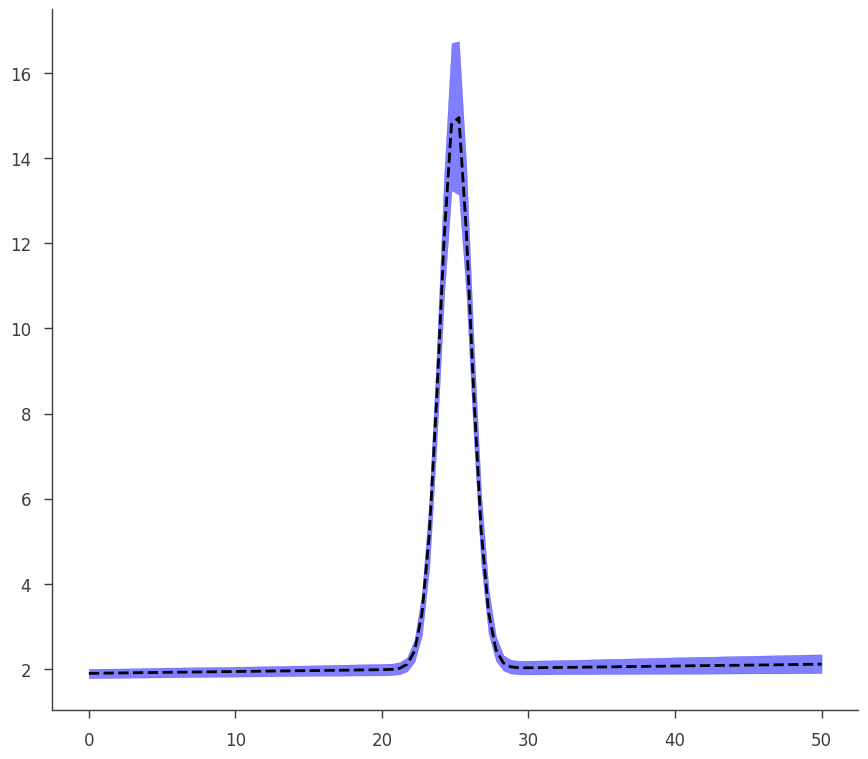

In [28]:
go(fitfun, ar, model)

## Bayesian Analysis Results
Analysis Results work exactly the same under Bayesian analysis.

Let's run the analysis first.

In [29]:

for parameter in ar.optimized_model:
    model[parameter.path].value = parameter.value

model.fake.spectrum.main.composite.a_1.set_uninformative_prior(Uniform_prior)
model.fake.spectrum.main.composite.b_1.set_uninformative_prior(Uniform_prior)
model.fake.spectrum.main.composite.F_2.set_uninformative_prior(Log_uniform_prior)
model.fake.spectrum.main.composite.mu_2.set_uninformative_prior(Uniform_prior)
model.fake.spectrum.main.composite.sigma_2.set_uninformative_prior(Log_uniform_prior)

bs = BayesianAnalysis(model, data)
bs.set_sampler("emcee")
bs.sampler.setup(n_iterations=1000, n_burn_in=100, n_walkers=20)
samples = bs.sample()

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
fake.spectrum.main.composite.a_1,1.88 -0.12 +0.11,1 / (keV s cm2)
fake.spectrum.main.composite.b_1,(5.0 -4 +2.8) x 10^-3,1 / (s cm2 keV2)
fake.spectrum.main.composite.F_2,(3.50 -0.5 +0.21) x 10,1 / (s cm2)
fake.spectrum.main.composite.mu_2,(2.503 -0.016 +0.008) x 10,keV
fake.spectrum.main.composite.sigma_2,1.04 -0.08 +0.12,keV


Values of -log(posterior) at the minimum:

,-log(posterior)
sim_data,-26.000977
total,-26.000977


Values of statistical measures:

,statistical measures
AIC,63.365589
BIC,71.562068
DIC,-49.432964
PDIC,-152.838741


Again, we grab the results from the BayesianAnalysis object:

In [30]:
ar2 = bs.results

We can write and read the results to/from a file:

In [31]:
ar2.write_to("test_bayes.fits", overwrite=True)

In [32]:
ar2_reloaded = load_analysis_results("test_bayes.fits")

The AR holds the posterior samples from the analysis. We can see the saved and live reults are the same:

In [33]:
np.allclose(ar2_reloaded.samples, ar2.samples)

True

**NOTE:** *MLE AR's store samples as well. These are the samples from the covariance matrix*

We can examine the marginal distributions of the parameters:

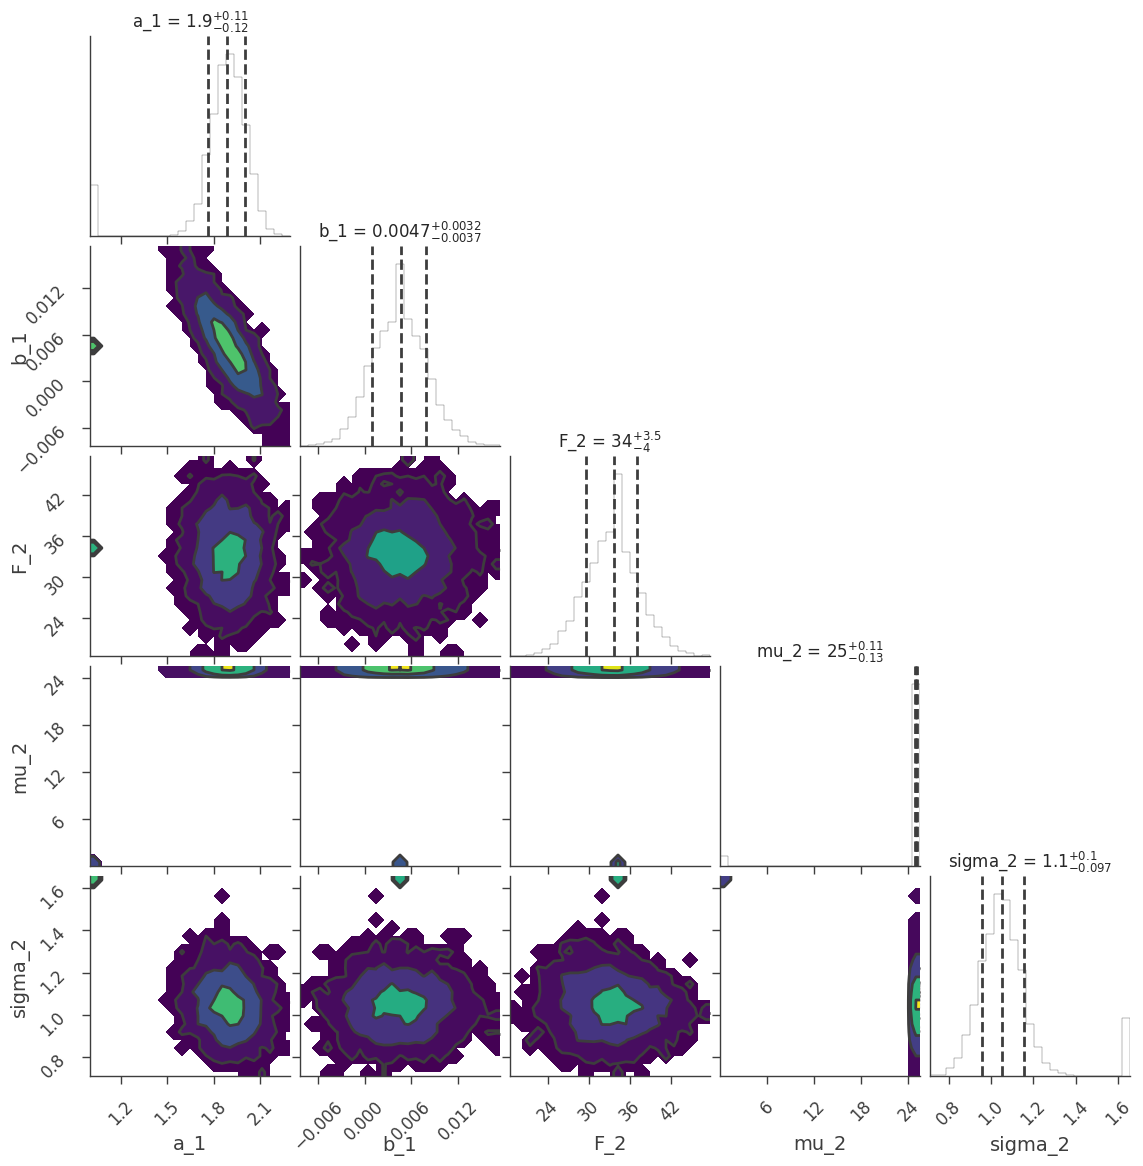

In [34]:
fig = ar2.corner_plot()

We can return pandas DataFrames with equal tail or HPD results.

In [35]:
ar2.get_data_frame("equal tail")

,value,negative_error,positive_error,error,unit
fake.spectrum.main.composite.a_1,1.882540,-0.118730,0.114664,0.116697,1 / (keV s cm2)
fake.spectrum.main.composite.b_1,0.005026,-0.004007,0.002831,0.003419,1 / (s cm2 keV2)
fake.spectrum.main.composite.F_2,35.040418,-5.425672,2.106216,3.765944,1 / (s cm2)
fake.spectrum.main.composite.mu_2,25.027441,-0.160720,0.079115,0.119918,keV
fake.spectrum.main.composite.sigma_2,1.036258,-0.080301,0.120203,0.100252,keV


In [36]:
ar2.get_data_frame("hpd")

,value,negative_error,positive_error,error,unit
fake.spectrum.main.composite.a_1,1.882540,-0.094067,0.135298,0.114683,1 / (keV s cm2)
fake.spectrum.main.composite.b_1,0.005026,-0.003910,0.002910,0.003410,1 / (s cm2 keV2)
fake.spectrum.main.composite.F_2,35.040418,-5.432891,2.089542,3.761216,1 / (s cm2)
fake.spectrum.main.composite.mu_2,25.027441,-0.146038,0.089004,0.117521,keV
fake.spectrum.main.composite.sigma_2,1.036258,-0.090272,0.108011,0.099141,keV


Error propagation operates the same way. Internally, the process is the same as the MLE results, however, the samples are those of the posterior rather than the (assumed) covariance matrix.

In [37]:
p1 = ar2.get_variates("fake.spectrum.main.composite.b_1")
p2 = ar2.get_variates("fake.spectrum.main.composite.a_1")

print(p1)
print(p2)

res = p1 + p2

print(res)

equal-tail: (4.7 -4 +3.2) x 10^-3, hpd: (4.7 -4 +3.2) x 10^-3
equal-tail: 1.89 -0.12 +0.11, hpd: 1.89 -0.10 +0.13
equal-tail: 1.89 -0.12 +0.11, hpd: 1.89 -0.10 +0.12


To demonstrate how the two objects (MLE and Bayes) are the same, we see that our plotting function written for the MLE result works on our Bayesian results seamlessly.

equal-tail: 1.91 -0.12 +0.11, hpd: 1.91 -0.13 +0.10


Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

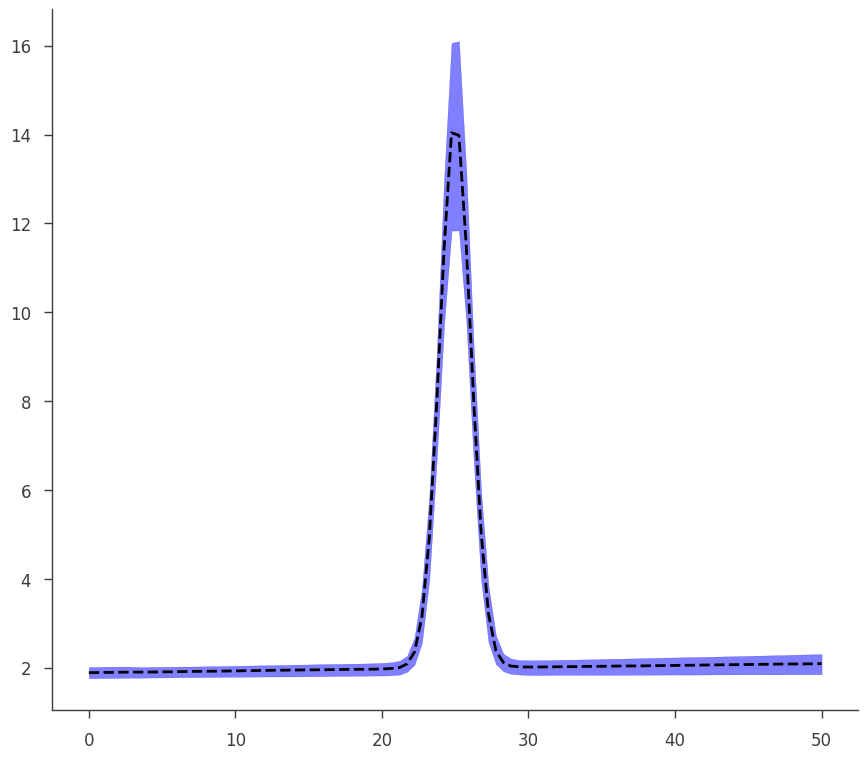

In [38]:
go(fitfun, ar2, model)